### 1. Install and load packages


In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import datetime,date
import demoji
import emoji
demoji.download_codes()
import string
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from io import StringIO

... OK (Got response in 0.62 seconds)
Writing emoji data to C:\Users\kbyc\.demoji\codes.json ...
... OK


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from textblob import TextBlob
import sys
import os

In [5]:
#!pip install textblob

In [6]:
#pip install pyspellchecker


In [7]:
#pip install emoji

### 2. Load data
    Add the missing days from 

In [8]:
df_17 = pd.read_csv('BTC_2017_NEW')
df_18 = pd.read_csv('BTC_2018_NEW')
df_19 = pd.read_csv('BTC_2019_v2')
df_20_07 = pd.read_csv('BTC_2020_07')
df_20 = pd.read_csv('BTC_2020_v2')


In [9]:
df_list = [df_20, df_20_07, df_19, df_18, df_17]

In [10]:
print(df_list)

[        Unnamed: 0  Unnamed: 0.1  \
0                0             0   
1                1             1   
2                2             2   
3                3             3   
4                4             4   
...            ...           ...   
998343      998343        998343   
998344      998344        998344   
998345      998345        998345   
998346      998346        998346   
998347      998347        998347   

                                                      url  \
0       https://twitter.com/bitcoinpanda69/status/1407...   
1       https://twitter.com/cryptolosophy/status/14078...   
2       https://twitter.com/tantonomini/status/1407850...   
3       https://twitter.com/Anthony04092882/status/140...   
4       https://twitter.com/tantonomini/status/1407850...   
...                                                   ...   
998343  https://twitter.com/SatoshiFlipper/status/1280...   
998344  https://twitter.com/BITCOIN_FEG/status/1280290...   
998345  https://t

[386456 rows x 28 columns]]


### 3. Merge data

In [11]:
df_btc = pd.concat(df_list)

In [12]:
df_btc.reset_index(drop=True, inplace=True)

In [13]:
print(df_btc)

         Unnamed: 0  Unnamed: 0.1  \
0                 0           0.0   
1                 1           1.0   
2                 2           2.0   
3                 3           3.0   
4                 4           4.0   
...             ...           ...   
2197134      386451           NaN   
2197135      386452           NaN   
2197136      386453           NaN   
2197137      386454           NaN   
2197138      386455           NaN   

                                                       url  \
0        https://twitter.com/bitcoinpanda69/status/1407...   
1        https://twitter.com/cryptolosophy/status/14078...   
2        https://twitter.com/tantonomini/status/1407850...   
3        https://twitter.com/Anthony04092882/status/140...   
4        https://twitter.com/tantonomini/status/1407850...   
...                                                    ...   
2197134  https://twitter.com/technology/status/87841412...   
2197135  https://twitter.com/ArtByteMe/status/878413276... 

[2197139 rows x 29 columns]


### 4. Remove unnecessary columns

In [14]:
#Remove unnecessary columns
df_col = df_btc[['date', 'content', 'retweetCount', 'likeCount']]
print(df_col)

                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  retweetCount  \
0        fooo isn't underwater\n\nfooo's entire net wor...             1   
1        Jejudoge CMC listing is Live! Currently Voted ...            10   
2        When people say “bitcoin is MySpace, something...             6   
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...             6   
4        HEX, BTC, ETH annual charts. B and E might be ...             2   
...                                                    ...           ...   
2197134  Bi

In [15]:
#Filter out the tweets that are below our threshold of relevance
df_1 = df_col[(df_col['retweetCount'] > 0) | (df_col['likeCount'] > 4)]
print(df_1)


                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  retweetCount  \
0        fooo isn't underwater\n\nfooo's entire net wor...             1   
1        Jejudoge CMC listing is Live! Currently Voted ...            10   
2        When people say “bitcoin is MySpace, something...             6   
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...             6   
4        HEX, BTC, ETH annual charts. B and E might be ...             2   
...                                                    ...           ...   
2197134  Bi

In [16]:
#Remove the last 2 columns
df_col2 = df_1[['date', 'content']]
print(df_col2)


                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  
0        fooo isn't underwater\n\nfooo's entire net wor...  
1        Jejudoge CMC listing is Live! Currently Voted ...  
2        When people say “bitcoin is MySpace, something...  
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...  
4        HEX, BTC, ETH annual charts. B and E might be ...  
...                                                    ...  
2197134  Bitcoin startup Blockchain raises $40 million ...  
2197135  ArtByte digital currency supports #artists aro

In [17]:
df_col3 = pd.to_datetime(df_col2['date']).dt.date
print(df_col3)


0          2021-06-23
1          2021-06-23
2          2021-06-23
3          2021-06-23
4          2021-06-23
              ...    
2197134    2017-06-24
2197135    2017-06-24
2197136    2017-06-24
2197137    2017-06-24
2197138    2017-06-24
Name: date, Length: 2195405, dtype: object


In [18]:
df_col2['Date'] = df_col3

df_2 = df_col2[['Date', 'content']]
print(df_2)


<ipython-input-18-5c8cbc12c59c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col2['Date'] = df_col3


               Date                                            content
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2197134  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2197135  2017-06-24  ArtByte digital currency supports #artists aro...
2197136  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2197137  2017-06-24  Currently: One bitcoin could feed me ground be...
2197138  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [19]:
df_2.reset_index(drop=True, inplace=True)

In [20]:
print(df_2)

               Date                                            content
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2195401  2017-06-24  ArtByte digital currency supports #artists aro...
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [21]:
#df_2.to_csv('BTC_2')

### 5. Rename content column

In [22]:
df_2_example = df_2

In [24]:
df_example = df_2_example

In [25]:
print(df_example)

               Date                                            content
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2195401  2017-06-24  ArtByte digital currency supports #artists aro...
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [26]:
df_example = df_example.rename(columns={'content':'content_ex'})

In [27]:
print(df_example)

               Date                                         content_ex
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2195401  2017-06-24  ArtByte digital currency supports #artists aro...
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


### 6. Emoji

In [29]:
str_emoji = df_example['content_ex'].to_csv()

In [30]:
str_demoji = emoji.demojize(str_emoji)

In [31]:
print(str_demoji)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
df_demoji = pd.read_csv(StringIO(str_demoji))
print(df_demoji)

         Unnamed: 0                                         content_ex
0                 0  fooo isn't underwater\n\nfooo's entire net wor...
1                 1  Jejudoge CMC listing is Live! Currently Voted ...
2                 2  When people say “bitcoin is MySpace, something...
3                 3  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4                 4  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2195400     2195400  Bitcoin startup Blockchain raises $40 million ...
2195401     2195401  ArtByte digital currency supports #artists aro...
2195402     2195402  What if the bitcoin bubble bursts? https://t.c...
2195403     2195403  Currently: One bitcoin could feed me ground be...
2195404     2195404  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [33]:
df_example['content_demoji'] = df_demoji['content_ex']
print(df_example)

               Date                                         content_ex  \
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...   
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...   
2        2021-06-23  When people say “bitcoin is MySpace, something...   
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...   
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...   
...             ...                                                ...   
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...   
2195401  2017-06-24  ArtByte digital currency supports #artists aro...   
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...   
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...   
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...   

                                            content_demoji  
0        fooo isn't underwater\n\nfooo's entire ne

In [34]:
df_final = df_example[['Date', 'content_ex', 'content_demoji']]
print(df_final)

               Date                                         content_ex  \
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...   
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...   
2        2021-06-23  When people say “bitcoin is MySpace, something...   
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...   
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...   
...             ...                                                ...   
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...   
2195401  2017-06-24  ArtByte digital currency supports #artists aro...   
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...   
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...   
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...   

                                            content_demoji  
0        fooo isn't underwater\n\nfooo's entire ne

### Remove URL

In [35]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_final["content_url"] = df_final["content_demoji"].apply(lambda text: remove_urls(text))

In [36]:
print(df_final.loc[28,'content_demoji'])

print(df_final.loc[28,'content_url'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming. :fire::sparkler::chart_increasing: https://t.co/7webUh9voX
This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming. :fire::sparkler::chart_increasing: 


### Cleaning

In [37]:
#target cleaning for emoji

df_final["content_demoji_clean"] = df_final["content_url"].replace(r"_", " ", regex=True)
df_final["content_demoji_clean"] = df_final["content_demoji_clean"].replace(r":", " ", regex=True)

In [38]:
print(df_final.loc[28,'content_demoji'])

print(df_final.loc[28,'content_demoji_clean'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming. :fire::sparkler::chart_increasing: https://t.co/7webUh9voX
This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  fire  sparkler  chart increasing  


### Replace contractions with the full form

In [39]:
cList = {
  "ain’t": "am not",
  "aren’t": "are not",
  "can’t": "cannot",
  "can’t’ve": "cannot have",
  "’cause": "because",
  "could’ve": "could have",
  "couldn’t": "could not",
  "couldn’t’ve": "could not have",
  "didn’t": "did not",
  "doesn’t": "does not",
  "don’t": "do not",
  "hadn’t": "had not",
  "hadn’t’ve": "had not have",
  "hasn’t": "has not",
  "haven’t": "have not",
  "he’d": "he would",
  "he’d’ve": "he would have",
  "he’ll": "he will",
  "he’ll’ve": "he will have",
  "he’s": "he is",
  "how’d": "how did",
  "how’d’y": "how do you",
  "how’ll": "how will",
  "how’s": "how is",
  "i’d": "i would",
  "i’d’ve": "i would have",
  "i’ll": "i will",
  "i’ll’ve": "i will have",
  "i’m": "i am",
  "i’ve": "i have",
  "isn’t": "is not",
  "it’d": "it had",
  "it’d’ve": "it would have",
  "it’ll": "it will",
  "it’ll’ve": "it will have",
  "it’s": "it is",
  "let’s": "let us",
  "ma’am": "madam",
  "mayn’t": "may not",
  "might’ve": "might have",
  "mightn’t": "might not",
  "mightn’t’ve": "might not have",
  "must’ve": "must have",
  "mustn’t": "must not",
  "mustn’t’ve": "must not have",
  "needn’t": "need not",
  "needn’t’ve": "need not have",
  "o’clock": "of the clock",
  "oughtn’t": "ought not",
  "oughtn’t’ve": "ought not have",
  "shan’t": "shall not",
  "sha’n’t": "shall not",
  "shan’t’ve": "shall not have",
  "she’d": "she would",
  "she’d’ve": "she would have",
  "she’ll": "she will",
  "she’ll’ve": "she will have",
  "she’s": "she is",
  "should’ve": "should have",
  "shouldn’t": "should not",
  "shouldn’t’ve": "should not have",
  "so’ve": "so have",
  "so’s": "so is",
  "that’d": "that would",
  "that’d’ve": "that would have",
  "that’s": "that is",
  "there’d": "there had",
  "there’d’ve": "there would have",
  "there’s": "there is",
  "they’d": "they would",
  "they’d’ve": "they would have",
  "they’ll": "they will",
  "they’ll’ve": "they will have",
  "they’re": "they are",
  "they’ve": "they have",
  "to’ve": "to have",
  "wasn’t": "was not",
  "we’d": "we had",
  "we’d’ve": "we would have",
  "we’ll": "we will",
  "we’ll’ve": "we will have",
  "we’re": "we are",
  "we’ve": "we have",
  "weren’t": "were not",
  "what’ll": "what will",
  "what’ll've": "what will have",
  "what’re": "what are",
  "what’s": "what is",
  "what’ve": "what have",
  "when’s": "when is",
  "when’ve": "when have",
  "where’d": "where did",
  "where’s": "where is",
  "where’ve": "where have",
  "who’ll": "who will",
  "who’ll've": "who will have",
  "who’s": "who is",
  "who’ve": "who have",
  "why’s": "why is",
  "why’ve": "why have",
  "will’ve": "will have",
  "won’t": "will not",
  "won’t've": "will not have",
  "would’ve": "would have",
  "wouldn’t": "would not",
  "wouldn’t've": "would not have",
  "y’all": "you all",
  "y’alls": "you alls",
  "y’all’d": "you all would",
  "y’all’d’ve": "you all would have",
  "y’all’re": "you all are",
  "y’all’ve": "you all have",
  "you’d": "you had",
  "you’d’ve": "you would have",
  "you’ll": "you you will",
  "you’ll’ve": "you you will have",
  "you’re": "you are",
  "you’ve": "you have",
    "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [40]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
 
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())
 
df_final['content_contr'] = df_final['content_demoji_clean'].apply(lambda text: expandContractions(text))
 

In [41]:
print(df_final.loc[0,'content_demoji_clean'])

print(df_final.loc[0,'content_contr'])

fooo isn't underwater

fooo's entire net worth is up 450x from March 2020 still

fooo hasn't been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy 
fooo is not underwater

fooo's entire net worth is up 450x from march 2020 still

fooo has not been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy 


In [42]:
# remove special characters, numbers and punctuations
df_final['content_clean'] = df_final['content_contr'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-42-3ea86378f6eb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['content_clean'] = df_final['content_contr'].str.replace("[^a-zA-Z#]", " ")


In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
stop_words = set(stopwords.words('english'))
print('not' in stop_words)

True


In [45]:
#Removing 'no' and 'not' to handle word negations
stop_words.remove('not')
stop_words.remove('no')

In [46]:
print('no' in stop_words)

False


In [47]:
def preprocess_tweet_text(tweet):

    #convert to lowercase
    tweet = tweet.lower()
    
    #remove any urls
    #tweet = re.sub(r"https\S+|www\S+|https\S+","", tweet, flags=re.MULTILINE)
    
    #remove punctuations
    tweet = tweet.translate(str.maketrans(" ", " ", string.punctuation))
    
    #remove user @ refreneces and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', "", tweet)
    
    # remove special characters, numbers and punctuations
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    
    #remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    #lemmatizing 
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)



In [48]:
df_final["content_clean_2"] = df_final["content_clean"].apply(lambda tweet: preprocess_tweet_text(tweet))

In [49]:
print(df_final.loc[28,'content_ex'])

print(df_final.loc[28,'content_clean_2'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming. 🔥🎇📈 https://t.co/7webUh9voX
daily close could one ages funding still negative btc amp eth not question fire winter not coming fire sparkler chart increasing


In [50]:
print(df_final.loc[100,'content_ex'])

print(df_final.loc[100,'content_clean_2'])

@FinancialTimes Anyone who can have there bitcoin taken from them has not done enough research in how to properly secure it.   Leaving it on exchange is like leaving $s in a bank, it can be confiscated at any time.   Secure your keys and there is nothing that can be done to take them from you.
financialtimes anyone bitcoin taken not done enough research properly secure leaving exchange like leaving bank confiscated time secure keys nothing done take


In [51]:
#df_final.to_csv('BTC_FINAL')

### Remove single letters

In [52]:
df_final['content_clean_3'] = df_final['content_clean_2'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

<ipython-input-52-ccd6a1d9b9c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['content_clean_3'] = df_final['content_clean_2'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


### Bigrams

In [53]:
# Extract only clean text
clean_tweets = pd.DataFrame(df_final.content_clean_3)

In [54]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in clean_tweets.content_clean_3])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.raw_freq)

In [55]:
bigram_freq = pd.DataFrame(bigram_scores)
bigram_freq.columns = ['bigram', 'raw_freq']
bigram_freq.sort_values(by='raw_freq', axis = 0, ascending = False, inplace = True)

In [56]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [57]:
bigram_freq.head()

,bigram,raw_freq
0,"(btc, eth)",0.002749
1,"(index, pointing)",0.001618
2,"(backhand, index)",0.001586
3,"(bitcoin, btc)",0.001467
4,"(btc, bitcoin)",0.001138


In [58]:
print(bigram_freq)

                      bigram  raw_freq
0                 (btc, eth)  0.002749
1          (index, pointing)  0.001618
2          (backhand, index)  0.001586
3             (bitcoin, btc)  0.001467
4             (btc, bitcoin)  0.001138
...                      ...       ...
65696     (expiration, date)  0.000001
65695  (expensive, transact)  0.000001
65694          (expect, not)  0.000001
65693    (expect, fireworks)  0.000001
66688          (zoot, bcash)  0.000001

[66689 rows x 2 columns]


In [59]:
bigram_freq[80:120]

,bigram,raw_freq
80,"(buying, bitcoin)",0.000250
81,"(pointing, backhand)",0.000248
82,"(not, even)",0.000247
83,"(not, know)",0.000243
84,"(hundred, points)",0.000238
85,"(bull, run)",0.000232
86,"(unknown, wallet)",0.000230
87,"(bull, market)",0.000230
88,"(bitcoin, litecoin)",0.000228
89,"(store, value)",0.000228


In [60]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_freq[bigram_freq.apply(lambda bigram: bigram.raw_freq > 0, axis = 1)][:500]

In [61]:
filtered_bigram.head(10)

,bigram,raw_freq
0,"(btc, eth)",0.002749
1,"(index, pointing)",0.001618
2,"(backhand, index)",0.001586
3,"(bitcoin, btc)",0.001467
4,"(btc, bitcoin)",0.001138
5,"(rocket, rocket)",0.001098
6,"(bitcoin, ethereum)",0.001094
7,"(check, mark)",0.001045
8,"(police, car)",0.000993
9,"(car, light)",0.000989


In [62]:
bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]

In [63]:
# examples of bigrams
bigrams[:20]

['btc eth',
 'index pointing',
 'backhand index',
 'bitcoin btc',
 'btc bitcoin',
 'rocket rocket',
 'bitcoin ethereum',
 'check mark',
 'police car',
 'car light',
 'skin tone',
 'smiling face',
 'money bag',
 'mark button',
 'bitcoin not',
 'tears joy',
 'face tears',
 'eth btc',
 'buy bitcoin',
 'let us']

In [64]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [65]:
tweets_w_ngrams = clean_tweets.copy()

In [66]:
tweets_w_ngrams.content_clean_3 = tweets_w_ngrams.content_clean_3.map(lambda x: replace_ngram(x))

In [67]:
# tokenize reviews 
tweets_w_ngrams = tweets_w_ngrams.content_clean_3.map(lambda x: [word for word in x.split()])

In [68]:
tweets_w_ngrams.head()

0    [fooo, not, underwater, fooo, entire, net, wor...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [people, say_bitcoin, myspace, something, gon_...
3    [cryptogodjohn, btc, bullish, amp, centricrise...
4    [hex, btc_eth, annual, charts, might, sign, co...
Name: content_clean_3, dtype: object

In [69]:
for i in range (len(tweets_w_ngrams)):
    tweets_w_ngrams[i] = " ".join(tweets_w_ngrams[i])
    
df_final['tweets_w_ngrams'] = tweets_w_ngrams

In [70]:
print(df_final.loc[0,'content_clean_3'])

print(df_final.loc[0,'tweets_w_ngrams'])

fooo not underwater fooo entire net worth march still fooo not underwater anything years trading spot vs btc pair literally hodling without leverage game becomes vomitously easy
fooo not underwater fooo entire net worth march still fooo not underwater anything years trading spot vs_btc_pair literally hodling without leverage game becomes vomitously easy


### Tokenization

In [71]:
tokenized_tweet = df_final['content_clean_3'].apply(lambda x: x.split())

In [72]:
tokenized_tweet.head()


0    [fooo, not, underwater, fooo, entire, net, wor...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [people, say, bitcoin, myspace, something, gon...
3    [cryptogodjohn, btc, bullish, amp, centricrise...
4    [hex, btc, eth, annual, charts, might, sign, c...
Name: content_clean_3, dtype: object

In [73]:
#combine words into single sentence (the code below will provide you with a whole sentance - without a list)
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df_final['content_tokenize'] = tokenized_tweet
df_final.head()


,Date,content_ex,content_demoji,content_url,content_demoji_clean,content_contr,content_clean,content_clean_2,content_clean_3,tweets_w_ngrams,content_tokenize
0,2021-06-23,fooo isn't underwater\n\nfooo's entire net wor...,fooo isn't underwater\n\nfooo's entire net wor...,fooo isn't underwater\n\nfooo's entire net wor...,fooo isn't underwater\n\nfooo's entire net wor...,fooo is not underwater\n\nfooo's entire net wo...,fooo is not underwater fooo s entire net wort...,fooo not underwater fooo entire net worth x ma...,fooo not underwater fooo entire net worth marc...,fooo not underwater fooo entire net worth marc...,fooo not underwater fooo entire net worth marc...
1,2021-06-23,Jejudoge CMC listing is Live! Currently Voted ...,Jejudoge CMC listing is Live! Currently Voted ...,Jejudoge CMC listing is Live! Currently Voted ...,Jejudoge CMC listing is Live! Currently Voted ...,jejudoge cmc listing is live! currently voted ...,jejudoge cmc listing is live currently voted ...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...
2,2021-06-23,"When people say “bitcoin is MySpace, something...","When people say “bitcoin is MySpace, something...","When people say “bitcoin is MySpace, something...","When people say “bitcoin is MySpace, something...","when people say “bitcoin is myspace, something...",when people say bitcoin is myspace something...,people say bitcoin myspace something gon na co...,people say bitcoin myspace something gon na co...,people say_bitcoin myspace something gon_na co...,people say bitcoin myspace something gon na co...
3,2021-06-23,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@cryptogodjohn #btc bullish &amp; @centricrise...,cryptogodjohn #btc bullish amp centricrise...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...
4,2021-06-23,"HEX, BTC, ETH annual charts. B and E might be ...","HEX, BTC, ETH annual charts. B and E might be ...","HEX, BTC, ETH annual charts. B and E might be ...","HEX, BTC, ETH annual charts. B and E might be ...","hex, btc, eth annual charts. b and e might be ...",hex btc eth annual charts b and e might be ...,hex btc eth annual charts b e might sign come ...,hex btc eth annual charts might sign come sinc...,hex btc_eth annual charts might sign come sinc...,hex btc eth annual charts might sign come sinc...


In [74]:
print(df_final.loc[399998,'content_ex'])

print(df_final.loc[399998,'content_tokenize'])

Did our taxes with Turbo Tax today and got almost $15 worth of bitcoin in a rebate from @trylolli. Pretty cool. https://t.co/vJ0cYG8Fzq
taxes turbo tax today got almost worth bitcoin rebate trylolli pretty cool


### Final dataset for Sentiment Analysis

In [164]:
#Remove unnecessary columns
df_3 = df_final[['Date', 'content_tokenize']]
df_3.head(10)

,Date,content_tokenize
0,2021-06-23,fooo not underwater fooo entire net worth marc...
1,2021-06-23,jejudoge cmc listing live currently voted comm...
2,2021-06-23,people say bitcoin myspace something gon na co...
3,2021-06-23,cryptogodjohn btc bullish amp centricrise bull...
4,2021-06-23,hex btc eth annual charts might sign come sinc...
5,2021-06-23,fun facts know tell friends based sales millio...
6,2021-06-23,inflation btc ada latter staking risk free way...
7,2021-06-23,metx bullish cross day close low bullish rever...
8,2021-06-23,otc bitcoin first bought jejudoge ethereum jun...
9,2021-06-23,rip officialmcafee crying face thank keeping u...


### Sentiment Analysis with TEXTBLOB

In [116]:
#create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [117]:
#create two new columns 
df_3['Subjectivity'] = df_3['content_tokenize'].apply(getSubjectivity)

<ipython-input-117-9bd2530ab4bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Subjectivity'] = df_3['content_tokenize'].apply(getSubjectivity)


In [166]:
# Create new 'Polarity' column and apply the getPolarity function
df_3['Polarity'] = df_3['content_tokenize'].apply(getPolarity)

<ipython-input-166-90ce1f521f09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Polarity'] = df_3['content_tokenize'].apply(getPolarity)


In [175]:
df_3.head(10)

,Date,content_tokenize,Polarity
0,2021-06-23,fooo not underwater fooo entire net worth marc...,0.066667
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.068182
2,2021-06-23,people say bitcoin myspace something gon na co...,0.285714
3,2021-06-23,cryptogodjohn btc bullish amp centricrise bull...,-0.050000
4,2021-06-23,hex btc eth annual charts might sign come sinc...,0.222222
5,2021-06-23,fun facts know tell friends based sales millio...,0.300000
6,2021-06-23,inflation btc ada latter staking risk free way...,0.150000
7,2021-06-23,metx bullish cross day close low bullish rever...,0.000000
8,2021-06-23,otc bitcoin first bought jejudoge ethereum jun...,0.159091
9,2021-06-23,rip officialmcafee crying face thank keeping u...,0.100000


In [169]:
print(df_3)

               Date                                   content_tokenize  \
0        2021-06-23  fooo not underwater fooo entire net worth marc...   
1        2021-06-23  jejudoge cmc listing live currently voted comm...   
2        2021-06-23  people say bitcoin myspace something gon na co...   
3        2021-06-23  cryptogodjohn btc bullish amp centricrise bull...   
4        2021-06-23  hex btc eth annual charts might sign come sinc...   
...             ...                                                ...   
2195400  2017-06-24  bitcoin startup blockchain raises million fres...   
2195401  2017-06-24  artbyte digital currency supports artists arou...   
2195402  2017-06-24                              bitcoin bubble bursts   
2195403  2017-06-24  currently one bitcoin could feed ground beef r...   
2195404  2017-06-24  not eat yer meat not bitcoin bitcoin not eat y...   

         Polarity  
0        0.066667  
1        0.068182  
2        0.285714  
3       -0.050000  
4        0.

### Group by Date and Sentiment

In [201]:
df_4 = df_10.groupby(['Date'], as_index = False).mean()
df_4.head(5)

,Date,Polarity
0,2017-06-24,0.073669
1,2017-06-25,0.087462
2,2017-06-26,0.060505
3,2017-06-27,0.086527
4,2017-06-28,0.104599


In [205]:
#Create a funstion to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_4['Analysis'] = df_4['Polarity'].apply(getAnalysis)

In [206]:
df_4.head(5)

,Date,Polarity,Analysis
0,2017-06-24,0.073669,Positive
1,2017-06-25,0.087462,Positive
2,2017-06-26,0.060505,Positive
3,2017-06-27,0.086527,Positive
4,2017-06-28,0.104599,Positive


In [209]:
btc = pd.merge(df_4, btc_price, how='outer', on='Date')
btc.head(5)

,Date,Polarity,Analysis,Price
0,2017-06-24,0.073669,Positive,2618.416736
1,2017-06-25,0.087462,Positive,2606.863235
2,2017-06-26,0.060505,Positive,2488.194163
3,2017-06-27,0.086527,Positive,2531.348999
4,2017-06-28,0.104599,Positive,2575.437770


<AxesSubplot:xlabel='Date'>

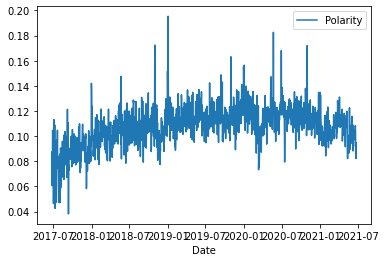

In [229]:
btc.plot(x='Date', y='Polarity')

<AxesSubplot:xlabel='Date'>

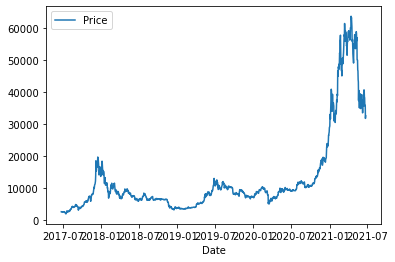

In [230]:
btc.plot(x='Date', y='Price')

### Correlation

In [228]:
data = btc[['Polarity', 'Price']]
correlation = data.corr(method='pearson')
print(correlation)

          Polarity     Price
Polarity  1.000000  0.015837
Price     0.015837  1.000000


In [128]:
items_count = df_4['Analysis'].value_counts()
print(items_count)

Positive    1461
Name: Analysis, dtype: int64


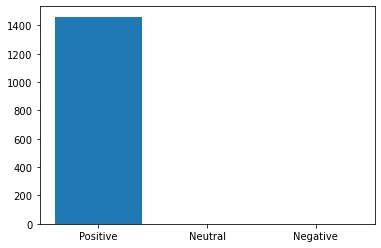

In [129]:
values = [1461, 0, 0]
names = ['Positive', 'Neutral', 'Negative']

plt.bar(names, values)
plt.show()

In [179]:
#Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_3['Analysis'] = df_3['Polarity'].apply(getAnalysis)
df_3.head(10)

<ipython-input-179-6b2b9b111d98>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Analysis'] = df_3['Polarity'].apply(getAnalysis)


,Date,content_tokenize,Polarity,Analysis
0,2021-06-23,fooo not underwater fooo entire net worth marc...,0.066667,Positive
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.068182,Positive
2,2021-06-23,people say bitcoin myspace something gon na co...,0.285714,Positive
3,2021-06-23,cryptogodjohn btc bullish amp centricrise bull...,-0.050000,Negative
4,2021-06-23,hex btc eth annual charts might sign come sinc...,0.222222,Positive
5,2021-06-23,fun facts know tell friends based sales millio...,0.300000,Positive
6,2021-06-23,inflation btc ada latter staking risk free way...,0.150000,Positive
7,2021-06-23,metx bullish cross day close low bullish rever...,0.000000,Neutral
8,2021-06-23,otc bitcoin first bought jejudoge ethereum jun...,0.159091,Positive
9,2021-06-23,rip officialmcafee crying face thank keeping u...,0.100000,Positive


In [180]:
df_3.head(5)

,Date,content_tokenize,Polarity,Analysis
0,2021-06-23,fooo not underwater fooo entire net worth marc...,0.066667,Positive
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.068182,Positive
2,2021-06-23,people say bitcoin myspace something gon na co...,0.285714,Positive
3,2021-06-23,cryptogodjohn btc bullish amp centricrise bull...,-0.050000,Negative
4,2021-06-23,hex btc eth annual charts might sign come sinc...,0.222222,Positive


In [181]:
df_group = df_3.groupby(['Date','Analysis'], as_index = False).count()

In [182]:
df_group.rename(columns={'Polarity': 'Count'}, inplace = True)

In [185]:
df_group = df_group.drop('content_tokenize', axis=1)

In [189]:
df_group.head(5)

,Date,Analysis,Count
0,2017-06-24,Negative,44
1,2017-06-24,Neutral,167
2,2017-06-24,Positive,126
3,2017-06-25,Negative,44
4,2017-06-25,Neutral,189


In [188]:
df_group['Count'].sum()

2195405

In [2]:
# Group by date and count

In [191]:
df_group_max = df_group.loc[df_group.groupby(['Date'])['Count'].idxmax()]
df_group_max.reset_index(drop=True, inplace=True)
df_group_max.head(5)

,Date,Analysis,Count
0,2017-06-24,Neutral,167
1,2017-06-25,Neutral,189
2,2017-06-26,Neutral,249
3,2017-06-27,Neutral,238
4,2017-06-28,Neutral,214


In [197]:
items_count_2 = df_group_max['Analysis'].value_counts()
print(items_count_2)

Positive    1325
Neutral      136
Name: Analysis, dtype: int64


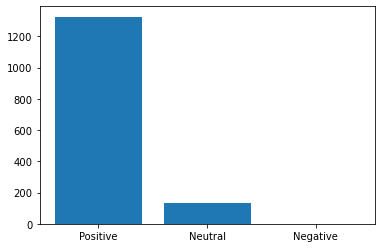

In [199]:
values = [1325, 136, 0]
names = ['Positive', 'Neutral', 'Negative']

plt.bar(names, values)
plt.show()

In [3]:
# Count Polarity for each Tweet

In [196]:
items_count_3 = df_3['Analysis'].value_counts()
print(items_count_3)

Positive    1117408
Neutral      717990
Negative     360007
Name: Analysis, dtype: int64


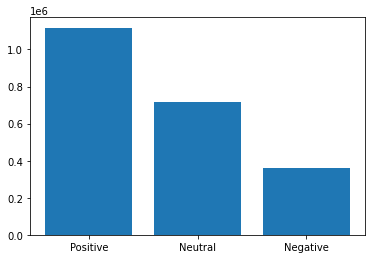

In [195]:
values = [1117408, 717990, 360007]
names = ['Positive', 'Neutral', 'Negative']

plt.bar(names, values)
plt.show()

In [76]:
df_4 = df_3.groupby(['Date'], as_index = False).agg({'content_tokenize': ''.join}, Inplace=True)
print(df_4)

            Date                                   content_tokenize
0     2017-06-24  late bitcoin price index usdthomass jamesfourm...
1     2017-06-25  late bitcoin price index usdcomparison bitcoin...
2     2017-06-26  late bitcoin price index usdanalyzing ether bi...
3     2017-06-27  late bitcoin price index usdbitcoin past sell ...
4     2017-06-28  late bitcoin price index usdkyletorpey blockch...
...          ...                                                ...
1456  2021-06-19  lightning network el salvador clean north amer...
1457  2021-06-20  check boy elvis new safemoon astronaut definit...
1458  2021-06-21  may sound counter intuitive best btc momentum ...
1459  2021-06-22  green button bounce btckishuinu trending coinm...
1460  2021-06-23  fooo not underwater fooo entire net worth marc...

[1461 rows x 2 columns]


### Load crypto prices

In [77]:
btc_price = pd.read_csv('btc_price.csv')
print(btc_price)


      Unnamed: 0  index                 datetime        date  hour variable  \
0              0      0  2017-06-24 00:00:00.000  2017-06-24     0  bitcoin   
1              1      1  2017-06-25 00:00:00.000  2017-06-25     0  bitcoin   
2              2      2  2017-06-26 00:00:00.000  2017-06-26     0  bitcoin   
3              3      3  2017-06-27 00:00:00.000  2017-06-27     0  bitcoin   
4              4      4  2017-06-28 00:00:00.000  2017-06-28     0  bitcoin   
...          ...    ...                      ...         ...   ...      ...   
1456        1456   1458  2021-06-19 00:00:00.000  2021-06-19     0  bitcoin   
1457        1457   1459  2021-06-20 00:00:00.000  2021-06-20     0  bitcoin   
1458        1458   1460  2021-06-21 00:00:00.000  2021-06-21     0  bitcoin   
1459        1459   1461  2021-06-22 00:00:00.000  2021-06-22     0  bitcoin   
1460        1460   1462  2021-06-23 00:00:00.000  2021-06-23     0  bitcoin   

             value  
0      2618.416736  
1      26

In [78]:
btc_price['Date'] = btc_price['date']
btc_price['Price'] = btc_price['value']
btc_price = btc_price[['Date', 'Price']]

In [80]:
btc_price['Date'] = pd.to_datetime(btc_price['Date']).dt.date

In [81]:
btc = pd.merge(df_4, btc_price, how='outer', on='Date')
print(btc)

            Date                                   content_tokenize  \
0     2017-06-24  late bitcoin price index usdthomass jamesfourm...   
1     2017-06-25  late bitcoin price index usdcomparison bitcoin...   
2     2017-06-26  late bitcoin price index usdanalyzing ether bi...   
3     2017-06-27  late bitcoin price index usdbitcoin past sell ...   
4     2017-06-28  late bitcoin price index usdkyletorpey blockch...   
...          ...                                                ...   
1456  2021-06-19  lightning network el salvador clean north amer...   
1457  2021-06-20  check boy elvis new safemoon astronaut definit...   
1458  2021-06-21  may sound counter intuitive best btc momentum ...   
1459  2021-06-22  green button bounce btckishuinu trending coinm...   
1460  2021-06-23  fooo not underwater fooo entire net worth marc...   

             Price  
0      2618.416736  
1      2606.863235  
2      2488.194163  
3      2531.348999  
4      2575.437770  
...            ...  


### Sentiment Analysis VADER

#### First Approach VADER

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples 
nltk.download('twitter_samples')
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [84]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in btc['content_tokenize'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
btc['sentiment'] = sentiment_label_list
btc['sentiment score'] = sentiment_score_list

In [85]:
print(btc)

            Date                                   content_tokenize  \
0     2017-06-24  late bitcoin price index usdthomass jamesfourm...   
1     2017-06-25  late bitcoin price index usdcomparison bitcoin...   
2     2017-06-26  late bitcoin price index usdanalyzing ether bi...   
3     2017-06-27  late bitcoin price index usdbitcoin past sell ...   
4     2017-06-28  late bitcoin price index usdkyletorpey blockch...   
...          ...                                                ...   
1456  2021-06-19  lightning network el salvador clean north amer...   
1457  2021-06-20  check boy elvis new safemoon astronaut definit...   
1458  2021-06-21  may sound counter intuitive best btc momentum ...   
1459  2021-06-22  green button bounce btckishuinu trending coinm...   
1460  2021-06-23  fooo not underwater fooo entire net worth marc...   

             Price sentiment  sentiment score  
0      2618.416736  Positive           0.9999  
1      2606.863235  Positive           0.9997  
2  

#### Second approach VADER


In [103]:
#create a function to get the Vader score
def Vader_score_pos(text):
    return analyser.polarity_scores(text)['pos']

In [104]:
#create new column 
btc['Vader_score_pos'] = btc['content_tokenize'].apply(Vader_score_pos)

In [105]:
#create a function to get the Vader score
def Vader_score_compound(text):
    return analyser.polarity_scores(text)['compound']

In [106]:
#create new column 
btc['Vader_score_compound'] = btc['content_tokenize'].apply(Vader_score_compound)

In [110]:
print(btc)

            Date                                   content_tokenize  \
0     2017-06-24  late bitcoin price index usdthomass jamesfourm...   
1     2017-06-25  late bitcoin price index usdcomparison bitcoin...   
2     2017-06-26  late bitcoin price index usdanalyzing ether bi...   
3     2017-06-27  late bitcoin price index usdbitcoin past sell ...   
4     2017-06-28  late bitcoin price index usdkyletorpey blockch...   
...          ...                                                ...   
1456  2021-06-19  lightning network el salvador clean north amer...   
1457  2021-06-20  check boy elvis new safemoon astronaut definit...   
1458  2021-06-21  may sound counter intuitive best btc momentum ...   
1459  2021-06-22  green button bounce btckishuinu trending coinm...   
1460  2021-06-23  fooo not underwater fooo entire net worth marc...   

             Price sentiment  sentiment score  \
0      2618.416736  Positive           0.9999   
1      2606.863235  Positive           0.9997   


<AxesSubplot:xlabel='Date'>

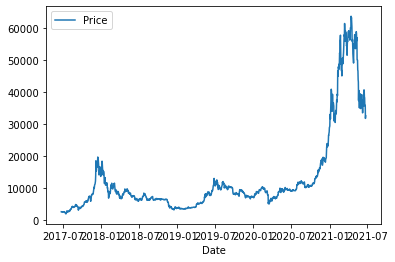

In [113]:
btc.plot(x='Date', y='Price')

<AxesSubplot:xlabel='Date'>

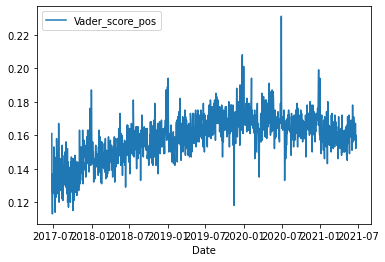

In [111]:
btc.plot(x='Date', y='Vader_score_pos')